# Week4 - Homework

- Execute the below code, then answer the numbered questions.
- You can create additinal code and markdown blocks

In [443]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/airbnb_nyc_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Question 1:
### Which features can we use?

In [444]:
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
45433,34745979,Sun-drenched Brooklyn town home large 3 bedroom,9450360,Rick,Brooklyn,Crown Heights,40.67772,-73.95564,Entire home/apt,278,2,7,2019-07-06,4.12,1,328
521,189732,Family & Friends in New York City,489400,O'Dell,Brooklyn,East New York,40.67497,-73.87305,Entire home/apt,169,3,177,2019-06-29,1.86,1,297
2950,1706997,Cozy 1BD next to Central Park,5662533,Megan,Manhattan,Upper West Side,40.77532,-73.97952,Private room,175,2,4,2016-08-05,0.10,1,0
44644,34336740,Upper West 1 Bedroom / 1 Bath. Lincoln Center,131647128,Emily,Manhattan,Upper West Side,40.77567,-73.98800,Entire home/apt,190,30,2,2019-06-15,1.36,25,322
12156,9433088,Relaxing Retreat in Williamsburg,34236533,Stan,Brooklyn,Williamsburg,40.70851,-73.94244,Private room,130,5,102,2019-07-01,2.48,1,288
34369,27254736,Beautiful Empire State Views Studio Apartment,14317115,Samantha,Manhattan,Kips Bay,40.74075,-73.97674,Entire home/apt,86,1,0,NaN,NaN,1,0
40977,31877100,Stylish Private Bedroom in Upper West Side 107,238321374,Eyal,Manhattan,Upper West Side,40.79891,-73.96116,Private room,60,30,1,2019-06-03,0.83,32,325
24010,19360685,NEWLY RENOVATED flat in doorman building,6670822,Yana,Manhattan,Lower East Side,40.71992,-73.99251,Entire home/apt,300,5,6,2019-07-01,0.24,1,45
22151,17835503,Manhattan/ Center of Manhattan,46506241,Marcy,Manhattan,Harlem,40.81213,-73.93950,Entire home/apt,70,4,9,2018-07-02,0.44,1,0
26750,21241829,Spacious 1BD in Greenwich Village/Union Square,78414842,Alexander,Manhattan,Greenwich Village,40.73393,-73.99306,Private room,200,3,9,2019-01-01,0.43,1,0


In [445]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [446]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [447]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [448]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [449]:
selected_features = ['neighbourhood_group','latitude', 'longitude', 'price', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df = df[selected_features]

In [450]:
df.head(10)

,neighbourhood_group,latitude,longitude,price,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,149,Private room,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,225,Entire home/apt,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,150,Private room,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,89,Entire home/apt,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,80,Entire home/apt,10,9,0.10,1,0
5,Manhattan,40.74767,-73.97500,200,Entire home/apt,3,74,0.59,1,129
6,Brooklyn,40.68688,-73.95596,60,Private room,45,49,0.40,1,0
7,Manhattan,40.76489,-73.98493,79,Private room,2,430,3.47,1,220
8,Manhattan,40.80178,-73.96723,79,Private room,2,118,0.99,1,0
9,Manhattan,40.71344,-73.99037,150,Entire home/apt,1,160,1.33,4,188


So, I removed id, name, host_id, host_name, neighbourhood and last_review as those are not relevant when trying to predict price.

In [451]:
from sklearn.model_selection import train_test_split
features = [
    'neighbourhood_group', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'
]

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 39,116
Records in test data: 9,779

Features:
neighbourhood_group
latitude
longitude
room_type
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


In [452]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               38843 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.4+ MB


## Question 2: 
Split the features into two lists, one for the numerical features and another for the categorical features.

In [453]:
# creating two empty lists and dividing features into num and cat features
numerical_features = []
categorical_features = []

for column in df.columns:
    if df[column].dtype=='int64' or df[column].dtype=='float64':
        numerical_features.append(column)
    elif df[column].dtype=='object':
        categorical_features.append(column)
        
print(numerical_features)
print(categorical_features)

['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
['neighbourhood_group', 'room_type']


## Question 3: 
 Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [454]:
cat_vars = ['neighbourhood_group', 'room_type']
num_vars = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# creating numerical pipeline and filling missing values with median
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

## Question 4: 
Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [455]:
# creating categorical pipeline
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

## Question 5: 

Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [456]:
from sklearn.compose import ColumnTransformer

# creating processing pipeline
processing_pipeline = ColumnTransformer(transformers=[('numerical_pipeline', num_pipeline, num_vars),
                                                      ('categorical_pipeline', cat_pipeline, cat_vars)])

print(processing_pipeline)

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['latitude', 'longitude', 'minimum_nights',
                                  'number_of_reviews', 'reviews_per_month',
                                  'calculated_host_listings_count',
                                  'availability_365']),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
  

## Question 6: 

Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [457]:
from sklearn.linear_model import LinearRegression

# creating linear regression model
modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])

modeling_pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['neighbourhood_group',
                                                   'room_type'])])),
                ('lm', LinearRegression())])

In [458]:
modeling_pipeline.fit(X_train, y_train)

X_test_transformed = processing_pipeline.transform(X_test)

In [459]:
price_predictions = modeling_pipeline.predict(X_test)

In [460]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, price_predictions)
r2

0.09163111645874034

## Question 7: 

Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

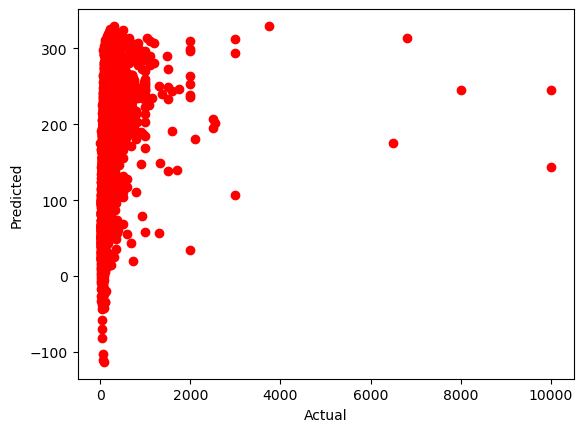

In [461]:
import matplotlib.pyplot as plt

plt.plot(y_test, price_predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

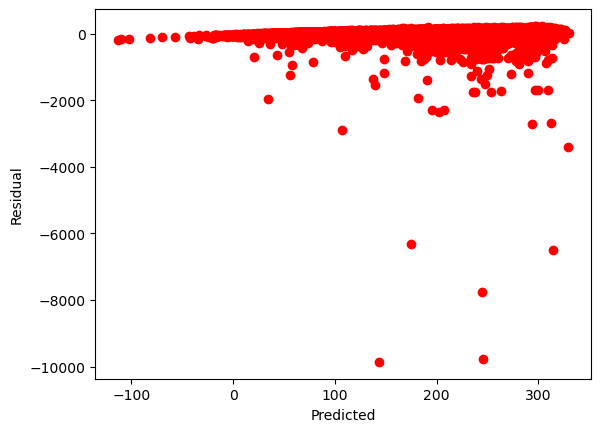

In [462]:
plt.plot(price_predictions, price_predictions - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

This isn't a perfect model so there are residuals going away from 0

## Question 8: 

Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [464]:
from sklearn.linear_model import Ridge

modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=0))])
modeling_pipeline_ridge.fit(X_train, y_train)
modeling_pipeline_ridge['ridge'].coef_

array([-1.08905905e+01, -2.29965309e+01, -1.27394233e+00, -1.34547526e+01,
       -8.48693838e-02, -5.34021572e+00,  2.55700678e+01, -3.25268945e+01,
        2.98427902e+01, -3.29358331e+00, -1.43170843e+02, -1.06576740e+02,
       -1.42680380e+02])

In [465]:
modeling_pipeline['lm'].coef_

array([-1.08905905e+01, -2.29965309e+01, -1.27394233e+00, -1.34547526e+01,
       -8.48693838e-02, -5.34021572e+00,  2.55700678e+01, -3.25268945e+01,
        2.98427902e+01, -3.29358331e+00, -1.43170843e+02, -1.06576740e+02,
       -1.42680380e+02])

In [473]:
from collections import defaultdict
alphas = [0, 1, 2, 5, 10, 50, 100]

ridge_results = defaultdict(dict)

for alph in alphas:
    modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=alph))])
    modeling_pipeline_ridge.fit(X_train, y_train)
    ridge_results['coefficients'][alph] = modeling_pipeline_ridge['ridge'].coef_
    ridge_results['training score'][alph] = modeling_pipeline_ridge.score(X_train, y_train)
    ridge_results['test score'][alph] = modeling_pipeline_ridge.score(X_test, y_test)

print('Done')

Done


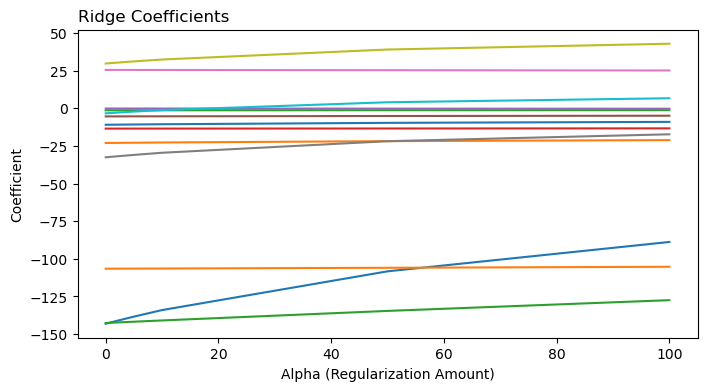

In [474]:
coefficients_ridge = pd.DataFrame.from_dict(ridge_results['coefficients'])
coefficients_ridge = coefficients_ridge.reset_index()
coefficients_ridge = coefficients_ridge.rename(columns={'index':'coefficient_nbr'})
coefficients_ridge = coefficients_ridge.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')

(
coefficients_ridge.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient')
    .plot(figsize=(8,4),legend=False)
)

plt.title('Ridge Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient')
plt.show()

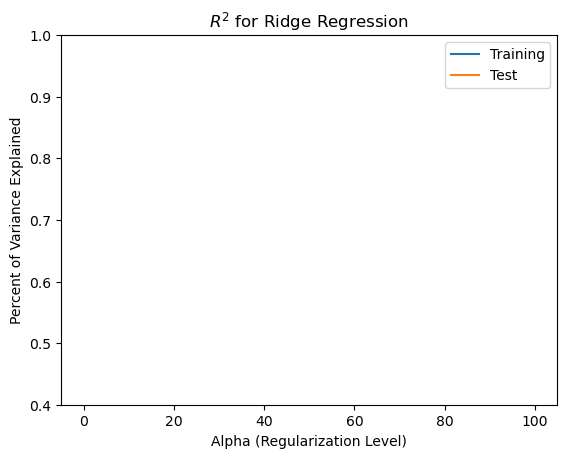

In [475]:
ridge_training_r2 = pd.Series(ridge_results['training score'])
ridge_test_r2 = pd.Series(ridge_results['test score'])

ridge_training_r2.plot()
ridge_test_r2.plot()
plt.title('$R^2$ for Ridge Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.ylim(0.4, 1)
plt.show()